# Problem 2

Model fitting to experimental data; binding kinetics. A researcher seeks to determine the kinetic association and dissociation rate constants for a fluorescently conjugated  peptide inhibitor of a G protein coupled receptor (GPCR). At time = 0, 2 nM peptide is added in excess to total amount of GPCR in the system.

# Problem 2a

A small aliquot of cells is taken at various time points, and the mean fluorescence intensity per cell is measured by flow cytometry. The data is shown in the appendix below. Use this data to estimate kobs in units of s-1.  Explicitly describe how you are estimating the variance of the experimental measurements.

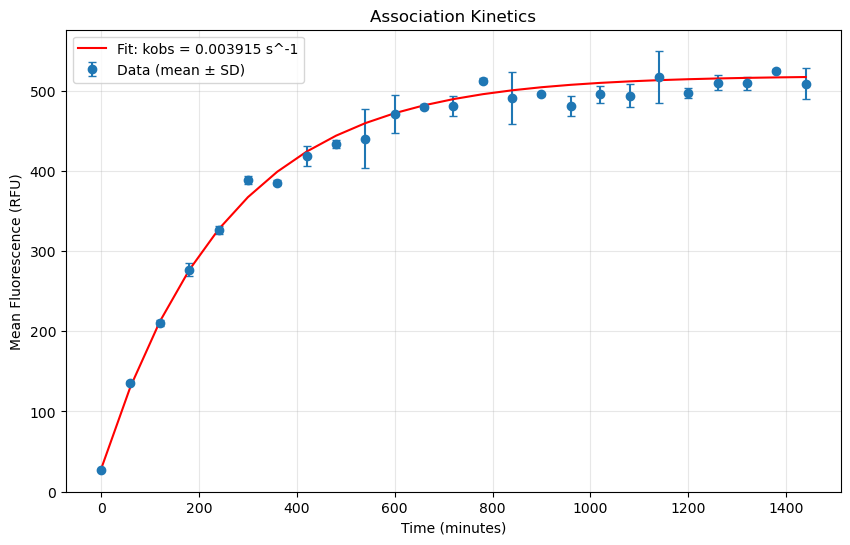

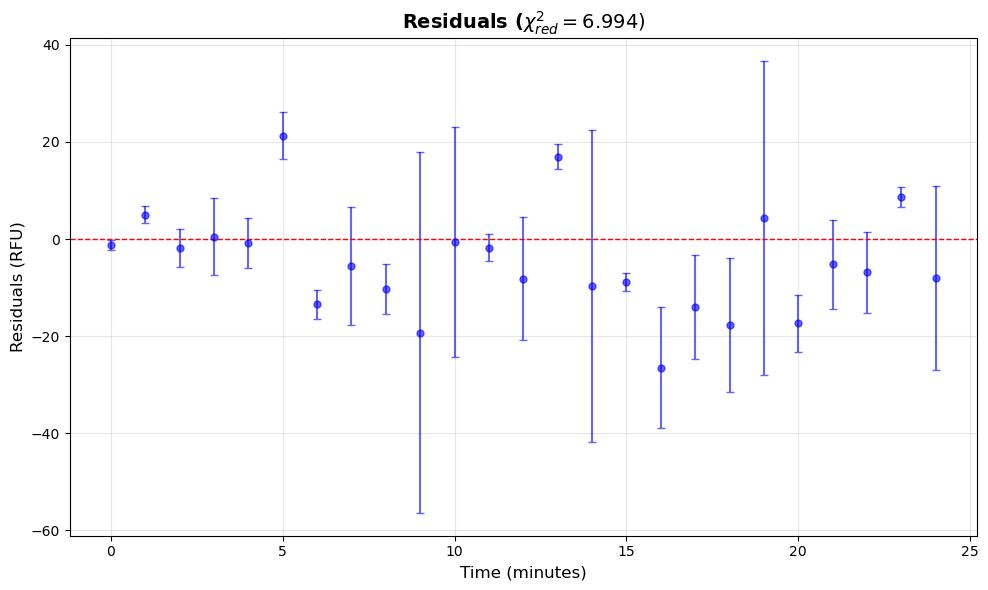


Fitted Model Parameters:
  F_0 (baseline)     = 28.26 ± 0.98 RFU
  F_max (plateau)    = 490.94 ± 1.59 RFU
  kobs (rate const.) = 0.003915 ± 0.000048 s⁻¹


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

RFU_1_n_2 = np.arange(0,25) # 0 - 25 minutes, every minute

RFU_1 = [
    28.1175, 
    137.8164, 
    214.3933, 
    284.9308, 
    321.3753, 
    384.0244, 
    382.768, 
    406.5881, 
    428.7236, 
    403.4527, 
    495.3277, 
    483.1867, 
    469.0635, 
    515.6617, 
    459.1608, 
    494.0164, 
    493.6711, 
    506.7711, 
    508.1366, 
    485.6006, 
    503.2869, 
    501.257, 
    517.8056, 
    527.6486, 
    528.3117
]
RFU_2 = [
    26.0673,
    134.3369,
    206.4876,
    269.077,
    331.734,
    393.5809,
    388.8242,
    431.0578,
    439.0722,
    477.75,
    447.9756,
    477.6035,
    494.3585,
    510.3881,
    523.3515,
    497.7501,
    468.7439,
    485.5247,
    480.5458,
    550.2934,
    491.4847,
    519.6835,
    501.235,
    523.5101,
    490.3895
]


# Calculate mean, variance, and standard deviation for RFU_1 and RFU_2
mean_RFU = (np.array(RFU_1) + np.array(RFU_2)) / 2
variance_RFU = (np.array(RFU_1) - mean_RFU)**2 + (np.array(RFU_2) - mean_RFU)**2
std_dev_RFU = np.sqrt(variance_RFU / 2)

# Convert time of RFU_1_n_2 and REP_1_n_2 to seconds
time_RFU_seconds = RFU_1_n_2 * 60

# Association model: F(t) = F_max * (1 - exp(-kobs*t)) + F_0
def association_model(t, F_max, kobs, F_0):
    return F_max * (1 - np.exp(-kobs * t)) + F_0

# Fit the model
popt_assoc, pcov_assoc = curve_fit(
    association_model, 
    time_RFU_seconds, 
    mean_RFU,
    p0=[500, 0.001, 25],  
    sigma=std_dev_RFU,
    absolute_sigma=True
)

F_max_fit, kobs_fit, F_0_fit = popt_assoc
param_stderr = np.sqrt(np.diag(pcov_assoc))
F_max_stderr, kobs_stderr, F_0_stderr = param_stderr

# Plot the fit
plt.figure(figsize=(10, 6))
plt.errorbar(time_RFU_seconds, mean_RFU, yerr=std_dev_RFU, 
             fmt='o', label='Data (mean ± SD)', capsize=3)
plt.plot(time_RFU_seconds, association_model(time_RFU_seconds, *popt_assoc), 
         'r-', label=f'Fit: kobs = {kobs_fit:.6f} s^-1')
plt.xlabel('Time (minutes)')
plt.ylabel('Mean Fluorescence (RFU)')
plt.title('Association Kinetics')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

def reducedchi2(y, residuals, P, eb=np.empty(1)):
    """
    Returns *reduced* chi^2 value for use in data modelling.
    Inputs:
    y - a vector of data.
    residuals - a vector of residuals from the model fit to the y
    P - the number of parameters fit in the model
    eb - a vector of error bars (1-to-1 correspondence with y)
    Outputs:
    reduced chi^2 value (scalar)
    """
    N = max(y.shape)
    if len(eb) == 0:
        terms = (residuals**2)/abs(y)
    else:
        terms = (residuals/eb)**2
    return sum(terms)/(N - P)

# Calculate residuals and chi-squared
y_fit = association_model(time_RFU_seconds, *popt_assoc)
residuals = mean_RFU - y_fit
chi2_reduced = reducedchi2(mean_RFU, residuals, P=3, eb=std_dev_RFU)

# Plot 2: Residuals plot
plt.figure(figsize=(10, 6))
plt.errorbar(RFU_1_n_2, residuals, yerr=std_dev_RFU,
             fmt='o', capsize=3, markersize=5, color='blue', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Residuals (RFU)', fontsize=12)
plt.title(r'Residuals ($\chi^2_{red} = ' + f'{chi2_reduced:.3f}' + ')$', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nFitted Model Parameters:")
print(f"  F_0 (baseline)     = {F_0_fit:.2f} ± {F_0_stderr:.2f} RFU")
print(f"  F_max (plateau)    = {F_max_fit:.2f} ± {F_max_stderr:.2f} RFU")
print(f"  kobs (rate const.) = {kobs_fit:.6f} ± {kobs_stderr:.6f} s⁻¹")


## Problem 2b

The researcher allows this sample to reach binding equilibrium. Then, they centrifuge the solution to pellet the cells, and resuspend the cells in a large amount of buffer containing no ligand. The volume is large enough (they hope; more on that later) that negligible re-binding occurs. The data is shown in the appendix below. Using a kinetic model of dissociation to find the most likely parameter value of $k_{off}$ [$s^{-1}$].

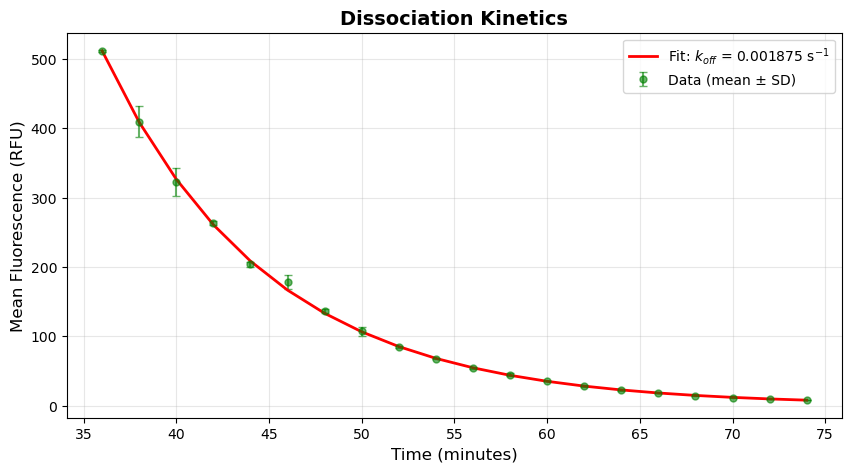

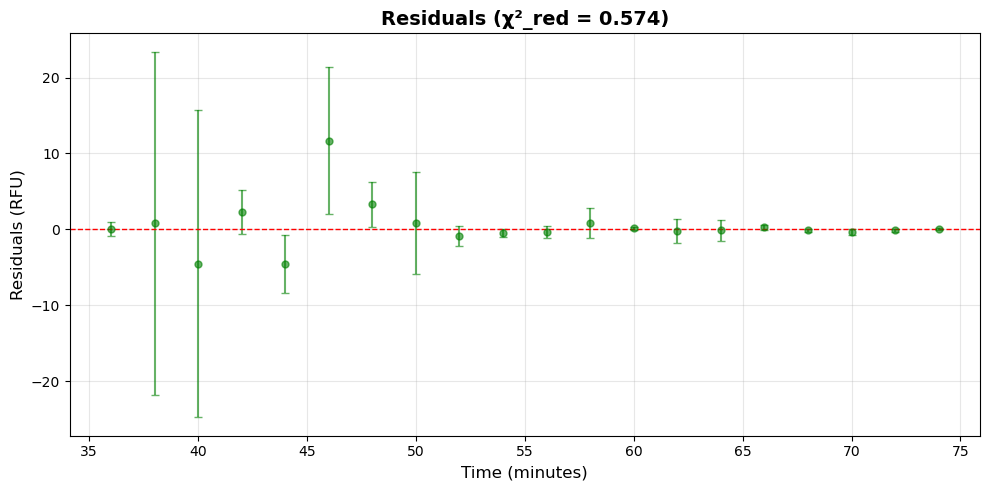


Fitted Model Parameters:
  F_0 (initial)      = 511.61 ± 0.91 RFU
  F_baseline (final) = 0.61 ± 0.15 RFU
  koff (rate const.) = 0.001875 ± 0.000005 s⁻¹


In [34]:
REP_1_n_2 = np.arange(36, 76, 2)  # 36-74 minutes, every 2 minutes

REP_1 = [
    512.5306,
    432.0442,
    301.632,
    260.1326,
    199.9067,
    187.8509,
    139.2577,
    113.9525,
    82.8541,
    68.0096,
    54.9186,
    46.4348,
    35.2376,
    29.3475,
    20.9918,
    18.061,
    14.1931,
    11.0158,
    9.6104,
    7.6308
]

REF_2 = [
    510.683,
    386.7691,
    342.0658,
    265.8788,
    207.5425,
    168.431,
    133.3951,
    100.435,
    85.5276,
    67.0039,
    53.349,
    42.423,
    34.8732,
    26.2597,
    23.7508,
    18.7014,
    14.6648,
    11.7411,
    9.1183,
    7.8531
]

# Calculate mean, variance, and standard deviation for REP_1 and REF_2
mean_REP = (np.array(REP_1) + np.array(REF_2)) / 2
variance_REP = (np.array(REP_1) - mean_REP)**2 + (np.array(REF_2) - mean_REP)**2
std_dev_REP = np.sqrt(variance_REP / 2)

time_REP_absolute = REP_1_n_2 * 60            # absolute time in seconds
time_dissoc_relative = (REP_1_n_2 - 36) * 60  # time since dissociation started (t=0 at 36 min)

# Dissociation model: F(t) = (F_0 - F_baseline) * exp(-koff*t) + F_baseline
def dissociation_model(t, F_0, koff, F_baseline):
    """
    F(t) = (F_0 - F_baseline) * exp(-koff*t) + F_baseline
    F_0: initial fluorescence at start of dissociation
    koff: dissociation rate constant
    F_baseline: baseline fluorescence (unbound)
    """
    return (F_0 - F_baseline) * np.exp(-koff * t) + F_baseline

# Fit the dissociation model
popt_dissoc, pcov_dissoc = curve_fit(
    dissociation_model, 
    time_dissoc_relative,  # Use time relative to start of dissociation
    mean_REP,
    p0=[500, 0.001, 25],  # Initial guesses: F_0, koff, F_baseline
    sigma=std_dev_REP,
    absolute_sigma=True
)

F_0_dissoc, koff_fit, F_baseline_fit = popt_dissoc
param_stderr_dissoc = np.sqrt(np.diag(pcov_dissoc))
F_0_stderr, koff_stderr, F_baseline_stderr = param_stderr_dissoc

# Calculate residuals and chi-squared
y_fit_dissoc = dissociation_model(time_dissoc_relative, *popt_dissoc)
residuals_dissoc = mean_REP - y_fit_dissoc
chi2_reduced_dissoc = reducedchi2(mean_REP, residuals_dissoc, P=3, eb=std_dev_REP)

# Plot the dissociation fit
plt.figure(figsize=(10, 5))
plt.errorbar(REP_1_n_2, mean_REP, yerr=std_dev_REP, 
             fmt='o', label='Data (mean ± SD)', capsize=3, markersize=5, 
             color='green', alpha=0.6)
plt.plot(REP_1_n_2, y_fit_dissoc, 
         'r-', linewidth=2, label=f'Fit: $k_{{off}}$ = {koff_fit:.6f} s$^{{-1}}$')
plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Mean Fluorescence (RFU)', fontsize=12)
plt.title('Dissociation Kinetics', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Plot 2: Residuals plot for dissociation
plt.figure(figsize=(10, 5))
plt.errorbar(REP_1_n_2, residuals_dissoc, yerr=std_dev_REP,
             fmt='o', capsize=3, markersize=5, color='green', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Residuals (RFU)', fontsize=12)
plt.title(f'Residuals (χ²_red = {chi2_reduced_dissoc:.3f})', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nFitted Model Parameters:")
print(f"  F_0 (initial)      = {F_0_dissoc:.2f} ± {F_0_stderr:.2f} RFU")
print(f"  F_baseline (final) = {F_baseline_fit:.2f} ± {F_baseline_stderr:.2f} RFU")
print(f"  koff (rate const.) = {koff_fit:.6f} ± {koff_stderr:.6f} s⁻¹")

## Problem 2c

Using the results from parts a-b, determine the most likely parameter values of $K_D$ [nM] and $k_{on}$ [$M^{-1}s^{-1}$].   

In [37]:
# Results from parts (a) and (b)
kobs_fit = 0.003915  # s^-1
koff_fit = 0.001875  # s^-1

# Given: peptide concentration [L] = 2 nM
L_nM = 2.0  # nM
L_M = L_nM * 1e-9  # Convert to M

# kon = (kobs - koff) / [L]
kon_fit = (kobs_fit - koff_fit) / L_M  # M^-1 s^-1

print("\n1. Calculate kon:")
print(f"      = {kon_fit:.3e} M⁻¹s⁻¹")

# Calculate KD from: KD = koff / kon
KD_M = koff_fit / kon_fit  # in M

# Convert to nM
KD_nM = KD_M * 1e9  # Convert M to nM

print("\n2. Calculate KD:")
print(f"     = {KD_M:.3e} M")



1. Calculate kon:
      = 1.020e+06 M⁻¹s⁻¹

2. Calculate KD:
     = 1.838e-09 M


## Problem 2d

Determine the 95% confidence intervals for $k_{obs}$ 

In [42]:
# Results from part (a)
kobs_fit = 0.003915  # s^-1
kobs_stderr = 0.000048  # s^-1
n_points = 25  # number of data points
n_params = 3  # number of fitted parameters (F_max, kobs, F_0)
degrees_of_freedom = n_points - n_params

# For 95% CI: α = 0.05, so α/2 = 0.025
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, degrees_of_freedom)

# 95% CI = kobs ± t_critical * SE(kobs)
CI_width_t = t_critical * kobs_stderr
kobs_CI_lower_t = kobs_fit - CI_width_t
kobs_CI_upper_t = kobs_fit + CI_width_t

print(f"  Significance level (α):        {alpha}")
print(r"  Critical t-value ($t_{0.025, " + f"{degrees_of_freedom}" + r"}$): " + f"{t_critical:.4f}")
print(f"  Standard error of kobs:        {kobs_stderr:.6f} s⁻¹")
print(f"  Margin of error:               {CI_width_t:.6f} s⁻¹")
print(f"\n  95% Confidence Interval for kobs:")
print(f"    kobs = {kobs_fit:.6f} ± {CI_width_t:.6f} s⁻¹")
print(f"    [{kobs_CI_lower_t:.6f}, {kobs_CI_upper_t:.6f}] s⁻¹")


  Significance level (α):        0.05
  Critical t-value ($t_{0.025, 22}$): 2.0739
  Standard error of kobs:        0.000048 s⁻¹
  Margin of error:               0.000100 s⁻¹

  95% Confidence Interval for kobs:
    kobs = 0.003915 ± 0.000100 s⁻¹
    [0.003815, 0.004015] s⁻¹


## Problem 2e

One of the assumptions for the confidence intervals calculated in part d. is that the error in the independent variable (here, the peptide concentration) is smaller than the errors in your biological measurement. As we discussed in class, protein and peptide concentrations can be calculated with an unsigned error of 20%. Using sensitivity analysis, calculate the likely error on $k_{obs}$ relative to errors in peptide concentration. Compare to the confidence intervals you calculated in part d. Is this assumption justified? 

In [48]:
# Given information - keep in nM for clarity
L_nominal_nM = 2.0  # nM (nominal peptide concentration)
L_nominal_M = L_nominal_nM * 1e-9  # Convert to M
d = 0.20  # 20% relative uncertainty in concentration

# From parts (a-c)
kobs_nominal = 0.003915  # s^-1
koff_fit = 0.001875  # s^-1
kon_fit = 1.020e6  # M^-1 s^-1 (from part c)

# Sensitivity calculation using finite difference
def kobs_function(L_M):
    """Calculate kobs for a given peptide concentration in M"""
    return kon_fit * L_M + koff_fit

L_upper = L_nominal_M * (1 + d/2)
L_lower = L_nominal_M * (1 - d/2)

kobs_upper = kobs_function(L_upper)
kobs_lower = kobs_function(L_lower)

# normalized sensitivity
S = (kobs_upper - kobs_lower) / (d * kobs_nominal)

print(f"Normalized sensitivity S = {S:.3f}")


Normalized sensitivity S = 0.521


The normalized sensitivity for $k_{obs}$ associated with a 20% uncertainty in peptide concentration is 0.521. If $k_{obs}$ were to vary by ±50%, the resulting deviation would fall outside the 95% confidence interval determined in part c. Therefore the assumption made is not strongly supported.
 

# Location of Jupyter Notebook

This file was created in jupyter notebook, rendered into `.html` through `jupyter nbconvert --to html PS5/PS5.ipynb` then the `.html` file was saved as a `.pdf`. The location of all said files are [github.com/caterer-z-t/CHEN_5150/PS5](https://github.com/caterer-z-t/CHEN_5150/tree/main/PS5)

Please contact [ztcaterer@colorado.edu](mailto:ztcaterer@colorado.edu) if there are any issues or concerns. 

Thanks :-)